<a href="https://colab.research.google.com/github/Spiegeldondi/double-pendulum/blob/main/double_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deriving Equations of Motion
A double pendulum consists of two pendulums, with the second hanging from the end of the first. Let's denote:

*   $m_1$, $m_2$: Masses of the first and second pendulums.
*   $l_1$, $l_2$: Lengths of the rods of the first and second pendulums.
*   $\theta_1$, $\theta_2$: Angles from the vertical for the first and second pendulums.
*   $g$: Acceleration due to gravity.

The positions $(x_1,y_1)$ and $(x_2,y_2)$ of the masses in terms of $\theta_1, \theta_2$ are:

*   $x_1 = l_1 \sin(\theta_1)$
*   $y_1 = -l_1 \cos(\theta_1)$
*   $x_2 = x_1 + l_2 \sin(\theta_2)$
*   $y_2 = y_1 - l_2 \cos(\theta_2)$

The Lagrangian $L$ for this system, which is the difference between kinetic $T$ and potential $U$ energies, is given by:

$L = T - U$

The kinetic and potential energies can be expressed as:

*   Kinetic Energy $T$:

    $T = \frac{1}{2} m_1 (\dot{x}_1^2 + \dot{y}_1^2) + \frac{1}{2} m_2 (\dot{x}_2^2 + \dot{y}_2^2)$

    where $\dot{x}_1^2, \dot{y}_1^2, \dot{x}_2^2, \dot{y}_2^2$ are the velocities of the masses.

*   Potential Energy $U$:

    $U = m_1 g y_1 + m_2 g y_2$

Substituting these into the expressions for the Lagrangian $L$, we can use the Euler-Lagrange equation to derive the equations of motion:

$\frac{d}{dt} \left( \frac{\partial L}{\partial \dot{\theta}_i} \right) - \frac{\partial L}{\partial \theta_i} = 0 \quad \text{for } i = 1,2$

Solving these equations will give us two second-order differential equations in $\theta_1$ and $\theta_2$.

*-> Second order ODEs here <-*

For more information on the derivation see: https://en.wikipedia.org/wiki/Double_pendulum

# Code for Simulation

We can use Python with libraries like NumPy and SciPy to solve these equations numerically. The simulation will involve calculating $\theta_1$ and $\theta_2$ over time and then plotting their trajectories.

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Constants
g = 9.81  # acceleration due to gravity
l1 = 1.0  # length of pendulum 1
l2 = 1.0  # length of pendulum 2
m1 = 1.0  # mass of pendulum 1
m2 = 1.0  # mass of pendulum 2
b1 = 0.05 # damping coefficient of pendulum 1
b2 = 0.05 # damping coefficient of pendulum 2

In [ ]:
def ode_system(y, t, l1, l2, m1, m2, b1, b2):
    """
    Transform the second-order ODEs of a damped double pendulum into first-order ODEs.

    The original problem, formulated in terms of second-order differential equations for the angles,
    is transformed into a system of first-order equations that can be solved numerically.

    Parameters:
    y (array): An array representing the current state [θ1, z1, θ2, z2].
               θ1, θ2 are the angles, and z1, z2 are the angular velocities of the pendulums.
    t (float): Current time. Not used in this calculation but required for odeint.
    l1 (float): Length of the first pendulum.
    l2 (float): Length of the second pendulum.
    m1 (float): Mass of the first pendulum.
    m2 (float): Mass of the second pendulum.
    b1 (float): Damping coefficient for the first pendulum.
    b2 (float): Damping coefficient for the second pendulum.

    Returns:
    list: First-order derivatives [θ1dot, z1dot, θ2dot, z2dot].
    """

    θ1, z1, θ2, z2 = y  # Unpack the current angles and angular velocities

    # Calculate cosine and sine of the angle difference for simplicity in equations
    c, s = np.cos(θ1-θ2), np.sin(θ1-θ2)

    # θ1dot and θ2dot are the angular velocities, which are the first derivatives of θ1 and θ2
    θ1dot = z1
    θ2dot = z2

    # Derive the first derivatives of the angular velocities (z1dot, z2dot)
    # These derivatives represent the angular accelerations of the pendulums
    z1dot = (m2*g*np.sin(θ2)*c - m2*s*(l1*z1**2*c + l2*z2**2) -
             (m1+m2)*g*np.sin(θ1) - b1*z1) / l1 / (m1 + m2*s**2)

    z2dot = ((m1+m2)*(l1*z1**2*s - g*np.sin(θ2) + g*np.sin(θ1)*c) +
             m2*l2*z2**2*s*c - b2*z2) / l2 / (m1 + m2*s**2)

    # Return the first-order derivatives as a list
    return θ1dot, z1dot, θ2dot, z2dot

In [ ]:
# Initial conditions: θ1, dθ1/dt, θ2, dθ2/dt
y0 = np.array([np.pi/2, 0, np.pi/2, 0])

# Specifications for the simulation playback
duration = 60  # duration of the simulation in seconds
fps = 25  # frames per second
num_frames = duration * fps  # total number of frames

# Time array
t = np.linspace(0, duration, num_frames)

# Integrate the equations of motion
result = odeint(ode_system, y0, t, args=(l1, l2, m1, m2, b1, b2))

θ1, θ2 = result[:, 0], result[:, 2]

# Convert to Cartesian coordinates for plotting
x1 = l1 * np.sin(θ1)
y1 = -l1 * np.cos(θ1)
x2 = x1 + l2 * np.sin(θ2)
y2 = y1 - l2 * np.cos(θ2)

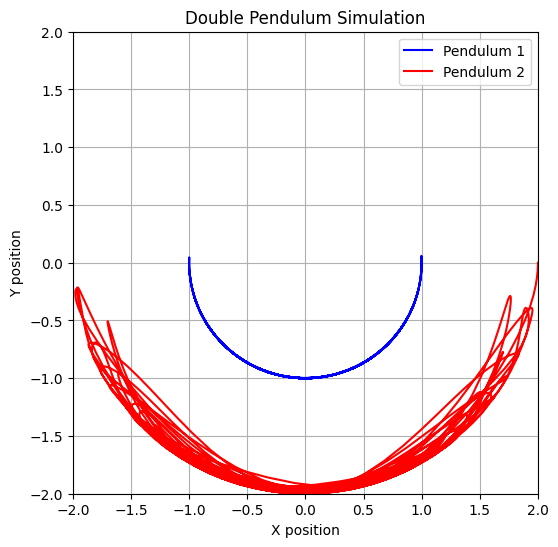

In [ ]:
# Plotting
plt.figure(figsize=(6, 6))
plt.plot(x1, y1, 'b-', label='Pendulum 1')
plt.plot(x2, y2, 'r-', label='Pendulum 2')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Double Pendulum Simulation')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='html5')

# Use the previously defined variables and functions

def init():
    """Initialize the animation."""
    line1.set_data([], [])
    line2.set_data([], [])
    point1.set_data([], [])
    point2.set_data([], [])
    return line1, line2, point1, point2

def animate(i):
    """Update the animation at each frame."""
    line1.set_data([0, x1[i]], [0, y1[i]])
    line2.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    point1.set_data(x1[i], y1[i])
    point2.set_data(x2[i], y2[i])
    return line1, line2, point1, point2

# Create figure and axes
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_xlim(-1.1 * (l1+l2), 1.1 * (l1+l2))
ax.set_ylim(-1.1 * (l1+l2), 1.1 * (l1+l2))

# Initialize lines and points for the pendulums
line1, = ax.plot([], [], 'ko-', lw=2)
line2, = ax.plot([], [], 'ko-', lw=2)
point1, = ax.plot([], [], 'bo', lw=2)
point2, = ax.plot([], [], 'ro', lw=2)

# Close matplotlib figure plot
plt.close()

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(t), init_func=init, blit=True, interval=1000/fps)

# Show the animation
ani

# To save the animation as a video file, uncomment these lines:
# ani.save('/content/drive/MyDrive/C - Hobbies & Interessen/Code/Colab Notebooks/double_pendulum.mp4', writer='ffmpeg')

<ipython-input-6-ae9b25e94c3c>:19: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point1.set_data(x1[i], y1[i])
<ipython-input-6-ae9b25e94c3c>:20: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point2.set_data(x2[i], y2[i])
